# Classification of a chosen feature from the provided Genshin dataset : Genshin Impact Character List Ver. 5.2



---



### Introduction

Genshin Impact is a famous free-to-play open-world fantasy adventure RPG game released in September 28, 2020. In order to celebrate its 5 year anniversary, we are gonna play with a old dataset(Ver. 5.2 of Genshin Impact) of characters retrieved on Kaggle.


### Objective

Our objective is to design a machine learning model capable of accurately classifying a specific 'object' from the Genshin dataset for fun learning purposes.

### Description of the dataset

Our dataset is a small one and contains `12` columns / features with only `91` records :


 * `Name` (type : String or Object)
 * `Element` (type : String or Object)
 * `Weapon` (type : String or Object)
 * `Region` (type : String or Object)
 * `Model Type` (type : String or Object)
 * `Release Date` (type : Other)
 * `Version` (type : Decimal)
 * `HP` (type : Integer)
 * `ATK` (type : Integer)
 * `DEF` (type : Integer)
 * `Ascension Stat` (type : String or Object)
 * `Ascension Stat Value` (type : Decimal)

We will make a machine model and some neural networks models in order to predict for example, the type of Weapon or the Model Type after doing some training on the dataset that will allow our model to learn the patterns in order to do predictions.

## **1. Prepare/clean the data for exploratory analysis purposes**

### **1. Importation of the necessary packages for the data analysis**

In [ ]:
# We import all the neccessary packages in order to analyse the data

# librairies Modeling & preprocessing import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report, \
ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split

# librairies for categorical/numerical pipelines, scaling and encoding
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector

# Librairies for classical machine learning models
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# performances metrics for model
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, f1_score

# Model Tuning
from sklearn.model_selection import GridSearchCV

# For model evaluation (using Regression metrics)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# librairies for Neural Network and to construct the models
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU

### **2. Loading the Genshin Impact's data**

In [ ]:
path = '/content/Genshin Impact Character List 2024 Merged.csv'

In [ ]:
# We load the datafile as panda dataframe
df = pd.read_csv(path)

### **3. Preview and informations about the data**


In [ ]:
# To preview the first five data of the dataframe
df.head()

,Name,Element,Weapon,Region,Model Type,Release Date,Version,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
0,Albedo,Geo,Sword,Mondstadt,Medium Male,12/23/2020,1.2,13225,251,876,Geo DMG Bonus,0.288
1,Alhaitham,Dendro,Sword,Sumeru,Tall Male,1/18/2023,3.4,13348,313,781,Dendro DMG Bonus,0.288
2,Aloy,Cryo,Bow,NaN,Medium Female,9/1/2021,2.1,10898,233,676,Cryo DMG Bonus,0.288
3,Amber,Pyro,Bow,Mondstadt,Medium Female,9/28/2020,1.0,9461,223,600,ATK,0.240
4,Arataki Itto,Geo,Claymore,Inazuma,Tall Male,12/14/2021,2.3,12858,227,959,CRIT Rate,0.192


By doing a priview of the 5 first lines we can notice the presence of "NaN" values that needs to be appropriately modified.

In [ ]:
# To preview the first five data of the dataframe
df.tail()

,Name,Element,Weapon,Region,Model Type,Release Date,Version,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
86,Yaoyao,Dendro,Polearm,Liyue,Short Female,1/18/2023,3.4,12288,212,750,HP,0.240
87,Yelan,Hydro,Bow,Liyue,Tall Female,5/31/2022,2.7,14450,243,547,CRIT Rate,0.192
88,Yoimiya,Pyro,Bow,Inazuma,Medium Female,8/10/2021,2.0,10164,322,614,CRIT Rate,0.192
89,Yun Jin,Geo,Polearm,Liyue,Medium Female,1/5/2022,2.4,10657,191,734,Energy Recharge,0.268
90,Zhongli,Geo,Polearm,Liyue,Tall Male,12/1/2020,1.1,14695,251,737,Geo DMG Bonus,0.288


In [ ]:
# Choosing a specific data to get information for fun on it
df.loc[[25]]

,Name,Element,Weapon,Region,Model Type,Release Date,Version,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
25,Faruzan,Anemo,Bow,Sumeru,Medium Female,12/7/2022,3.3,9569,196,627,ATK,0.24


In [ ]:
# We want to get informations on the dataframe (datatypes, Number of columns, rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  91 non-null     object 
 1   Element               90 non-null     object 
 2   Weapon                91 non-null     object 
 3   Region                89 non-null     object 
 4   Model Type            91 non-null     object 
 5   Release Date          91 non-null     object 
 6   Version               91 non-null     float64
 7   HP                    91 non-null     int64  
 8   ATK                   91 non-null     int64  
 9   DEF                   91 non-null     int64  
 10  Ascension Stat        91 non-null     object 
 11  Ascension Stat Value  91 non-null     float64
dtypes: float64(2), int64(3), object(7)
memory usage: 8.7+ KB


### **3. Checking the missing values (NaN)**

In [ ]:
# We check for the presence of missing data (NaN values)
df.isna().sum()

,0
Name,0
Element,1
Weapon,0
Region,2
Model Type,0
Release Date,0
Version,0
HP,0
ATK,0
DEF,0


In [ ]:
# Another way to check missing values, same as isna()
df.isnull().sum()

,0
Name,0
Element,1
Weapon,0
Region,2
Model Type,0
Release Date,0
Version,0
HP,0
ATK,0
DEF,0


<Axes: >

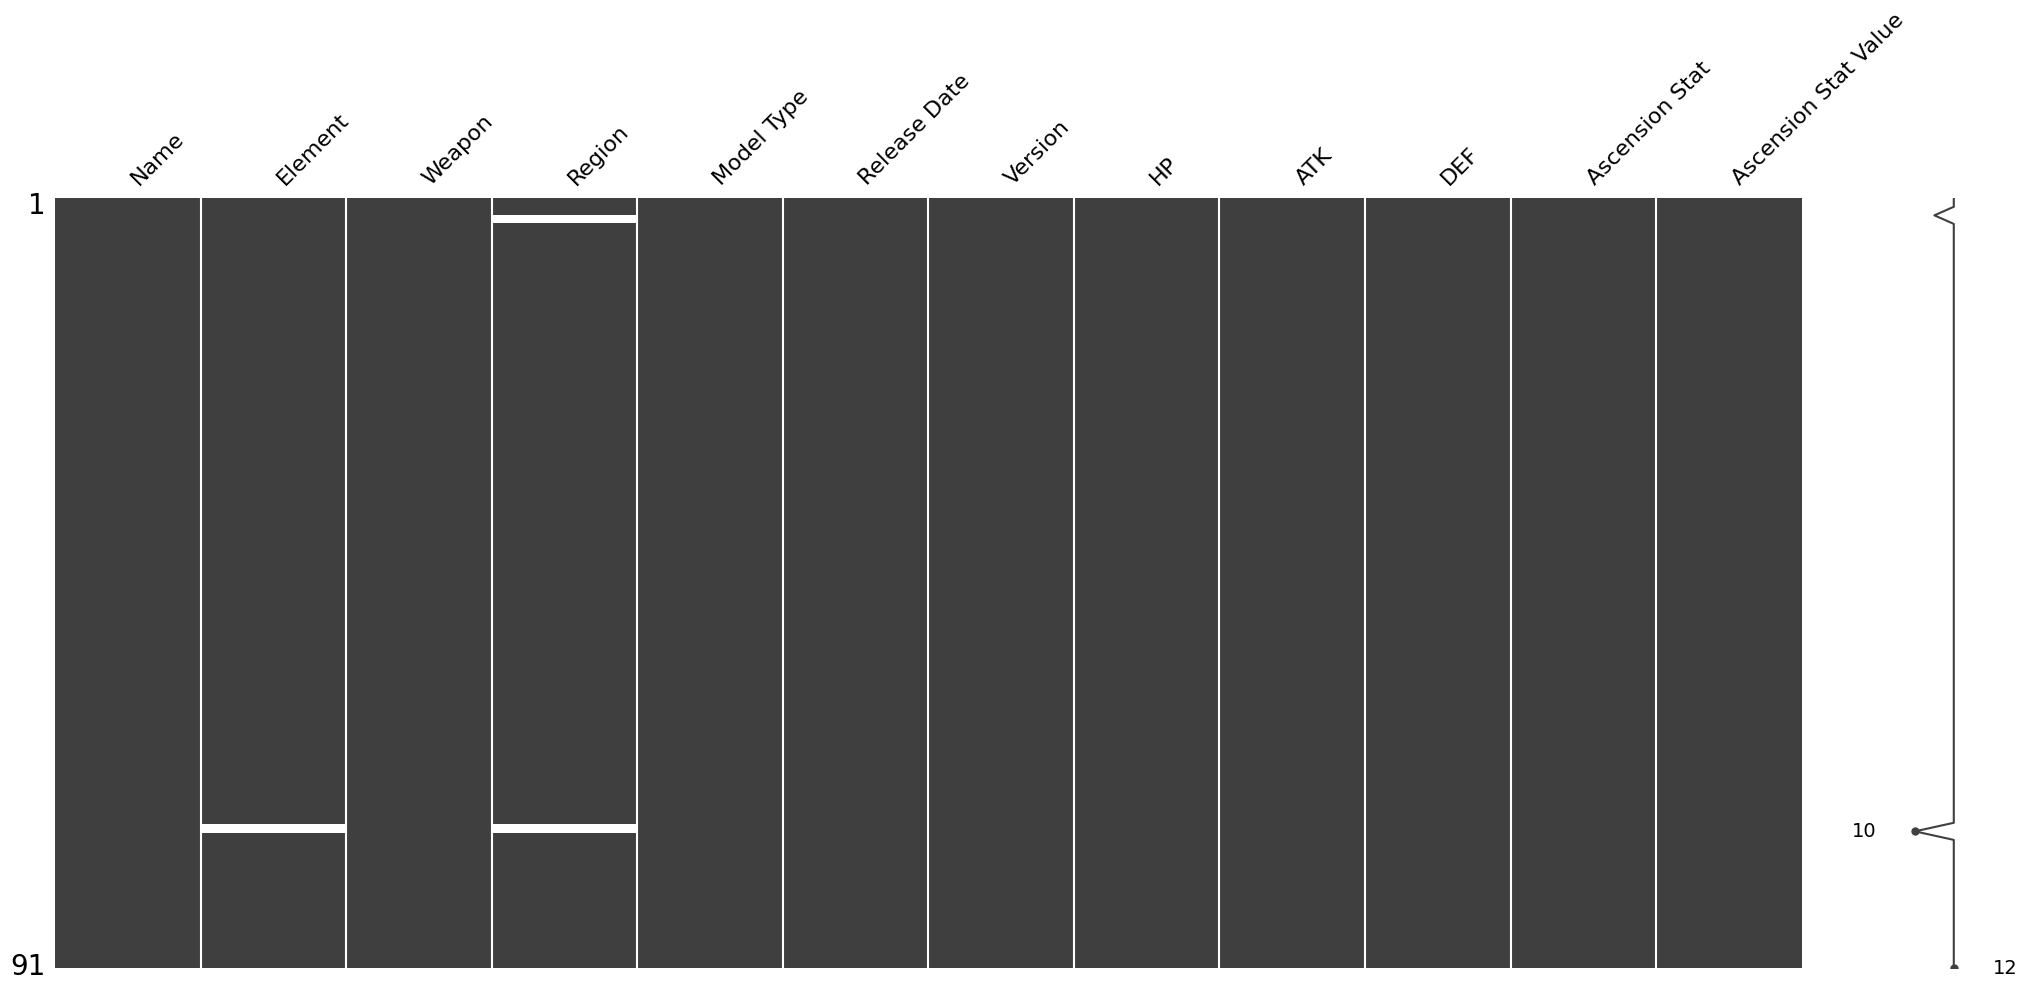

In [ ]:
# Just for Visualizing that there is no missing values in the dataset using a matrix plot
import missingno as msno
msno.matrix(df) # Matrix of vizualisation using panda dataframe

As we have said before, there are effectively some "NaN" values, especially in the Region (1 "NaN") and Element (2 "NaN") categories.

In [ ]:
# In order to locate rows with NaN values in the 'Element' column
print("Rows with missing 'Element' values:")
display(df[df['Element'].isna()])

# In order to locate rows with NaN values in the 'Region' column
print("\nRows with missing 'Region' values:")
display(df[df['Region'].isna()])

Rows with missing 'Element' values:


,Name,Element,Weapon,Region,Model Type,Release Date,Version,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
74,Traveler,NaN,Sword,NaN,Aether: Medium MaleLumine: Medium Female,9/28/2020,1.0,10874,212,682,ATK,0.24



Rows with missing 'Region' values:


,Name,Element,Weapon,Region,Model Type,Release Date,Version,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
2,Aloy,Cryo,Bow,NaN,Medium Female,9/1/2021,2.1,10898,233,676,Cryo DMG Bonus,0.288
74,Traveler,NaN,Sword,NaN,Aether: Medium MaleLumine: Medium Female,9/28/2020,1.0,10874,212,682,ATK,0.240


### **4. Unique count for each columns**

In [ ]:
# We count the number of unique values for the entire dataframe for each column
df.nunique()

,0
Name,91
Element,7
Weapon,5
Region,7
Model Type,6
Release Date,53
Version,36
HP,59
ATK,52
DEF,62


In [ ]:
# We count the number of unique values for the entire dataframe for each column
df.nunique()

,0
Name,91
Element,7
Weapon,5
Region,7
Model Type,6
Release Date,53
Version,36
HP,59
ATK,52
DEF,62


This time, let's choose `Element` as our first target, so we can also count the number of unique values of `Element` only.

In [ ]:
# The number of unique values of Element only :
print('There are', df['Element'].nunique(), 'unique values in the Element column.')

There are 7 unique values in the Element column.


In [ ]:
# But we are interested more in checking what are these unique of Element, then :
df['Element'].unique()

array(['Geo', 'Dendro', 'Cryo', 'Pyro', 'Hydro', 'Electro', 'Anemo', nan],
      dtype=object)

We are indeed getting 7 unique values in the `Element` category. However, as seen there is the presence of NaN noticeable as 'nan' that must be handled.

### **5. Handling the missing values**

In order to avoid the NaN values and since that we only have one NaN value in `Element` category, we can rename the value as "Multiple Element".

Why ?

Because in the game, the "Traveler" of `Name` category is a character that can use multiple elements such as "Anemo", "Electro", "Hydro"...

Thus, we will rename using the fillna method and then check if the modification are well taken in place.




In [ ]:
# So, we rename 'nan' in the 'Element' column to 'Multiple Element'
df['Element'] = df['Element'].fillna('Multiple Element')

In [ ]:
# Then we check the unique values of the 'Element' column again to see the changements.
print("Unique values in 'Element' after filling NaN:")
display(df['Element'].unique())

Unique values in 'Element' after filling NaN:


array(['Geo', 'Dendro', 'Cryo', 'Pyro', 'Hydro', 'Electro', 'Anemo',
       'Multiple Element'], dtype=object)

We can see that our modification took in place, 'nan' became 'Multiple Element. Now, we still have to handle the `Region` category's missing values NaN.

By looking again at the specific rows containing the missing values :

In [ ]:
# In order to locate rows with NaN values in the 'Element' column
print("Rows with missing 'Element' values:")
display(df[df['Element'].isna()])

# In order to locate rows with NaN values in the 'Region' column
print("\nRows with missing 'Region' values:")
display(df[df['Region'].isna()])

Rows with missing 'Element' values:


,Name,Element,Weapon,Region,Model Type,Release Date,Version,HP,ATK,DEF,Ascension Stat,Ascension Stat Value



Rows with missing 'Region' values:


,Name,Element,Weapon,Region,Model Type,Release Date,Version,HP,ATK,DEF,Ascension Stat,Ascension Stat Value
2,Aloy,Cryo,Bow,NaN,Medium Female,9/1/2021,2.1,10898,233,676,Cryo DMG Bonus,0.288
74,Traveler,Multiple Element,Sword,NaN,Aether: Medium MaleLumine: Medium Female,9/28/2020,1.0,10874,212,682,ATK,0.240


Looking at the `Name` category, we can notice that this concerns only these two characters :


1.   "Aloy", a character that comes from the game Horizon Zero Dawn as part of a collaboration.
2.   "Traveler", again is the special main character (the protagonist) of the game's story. It's a character that comes from a different world from the world that the game actually based on (Teyvat).

So using the fillna method again :

In [ ]:
#We rename 'nan' in the 'Element' column to 'Multiple Element'
df['Element'] = df['Element'].fillna('Multiple Element')

# We replace the NaN in 'Region' for 'Aloy' with 'Special'
df.loc[df['Name'] == 'Aloy', 'Region'] = df.loc[df['Name'] == 'Aloy', 'Region'].fillna('Special')

# We also replace the NaN in 'Region' for 'Traveler' with "Another world's region"
df.loc[df['Name'] == 'Traveler', 'Region'] = df.loc[df['Name'] == 'Traveler', 'Region'].fillna("Another world's region")

We now check the modifications as we did for the `Element` category :

In [ ]:
# We can check the rows with missing 'Region' values by doing :
print("Rows with missing 'Region' values after filling NaN:")
display(df[df['Region'].isna()])

Rows with missing 'Region' values after filling NaN:


,Name,Element,Weapon,Region,Model Type,Release Date,Version,HP,ATK,DEF,Ascension Stat,Ascension Stat Value


In [ ]:
# We can also check the modifications with :
print("Unique values in 'Element' after filling NaN:")
display(df['Region'].unique())

Unique values in 'Element' after filling NaN:


array(['Mondstadt', 'Sumeru', 'Special', 'Inazuma', 'Snezhnaya', 'Liyue',
       'Fontaine', 'Natlan', "Another world's region"], dtype=object)

By the presence of the 'Special' and "Another world's region", we can see that the changes have been taken into account.

### **6. Handling the duplicates rows**


In [ ]:
# Function that we can use to be sure of presence of duplicated values or not
print(df.duplicated().any(), ':there is no presence of duplicated values in the dataset.')

False :there is no presence of duplicated values in the dataset.


## **2. Data preparation for modeling**
### **1. Data preprocesing for our models**

In [ ]:
# @title Preparation of the data for deep learning model training and evaluation

# We define X and y and complete the train test split to avoid data leakage

X = df.drop(columns = 'Element') # the features, what we will use to predict
y = df['Element'] # what we want to predict, the target

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

We begin to split the data into two different sets :

*   Training set
*   Testing set

The Training set is to train the model and the Testing set for testing the our model's performance on unseen data.
This splitting allows us to avoid any data leakage which would influence the model's performance during the test part.

In [ ]:
# We check the shape/form of the X_train which excatly correspond to 75 % of the data (it's then 3 times the X_Test size)
X_train.shape

(68, 11)

In [ ]:
# We check the shape/form of the X train which exactly correspond to 25 % of the data
X_test.shape

(23, 11)

With this, we can calculate the percentage of the train data and test data

In [ ]:
# The total dataset
total_data = len(X_train) + len(X_test)

# The percentage of samples in X_train
X_train_percentage = (len(X_train) / total_data) * 100

# The percentage of samples in X_test
X_test_percentage = (len(X_test) / total_data) * 100

# Then the percentages becomes
print(f"X_train Percentage: {X_train_percentage:.2f}%")
print(f"X_test Percentage: {X_test_percentage:.2f}%")

X_train Percentage: 74.73%
X_test Percentage: 25.27%


We have :

* X_Train has a shape (68, 11)
* X_Test has a shape (23, 11)

So, we have then have in our entire dataset :

* X_Train = `74.73%`
* X_Test = `25.27%`

Those values are common learning case.

This means we have gotten a good distribution of data because we are providing enough data for the model to learn (`74.73%`) and some decent unseen data for testing the model(`25.27%`)

In [ ]:
# To check classes balance
y_train.value_counts(normalize=True)

,proportion
Element,
Cryo,0.176471
Pyro,0.176471
Anemo,0.132353
Geo,0.132353
Hydro,0.132353
Dendro,0.132353
Electro,0.102941
Multiple Element,0.014706


Looking at the proportion of each class of the the target : `Element`, is crucial in helping us to understand if the dataset is balanced.


The targets proportions are somewhat balalanced despite the fact that there is a noticeable discrepancy between the Electro `Element` and Cryo/Pyro `Element` class. So there might be some dominance issue during the training part. Indeed, class imbalance can negatively affect the performance of machine learning models. If one class is heavily over-represented, the model might become biased towards that class and perform poorly on the under-represented classes.

However, it's not a issue that matter that much, it's simply that our model will train more on some class than others. Thus the model will have a better performance on those classes.

The main issue there would be due to the special case which is the 'Multiple Element' with a proportion of `0.014706` which is very low compared to the other classes of `Element`. It's normal because we only have one character that is subject of such class, the Traveler.

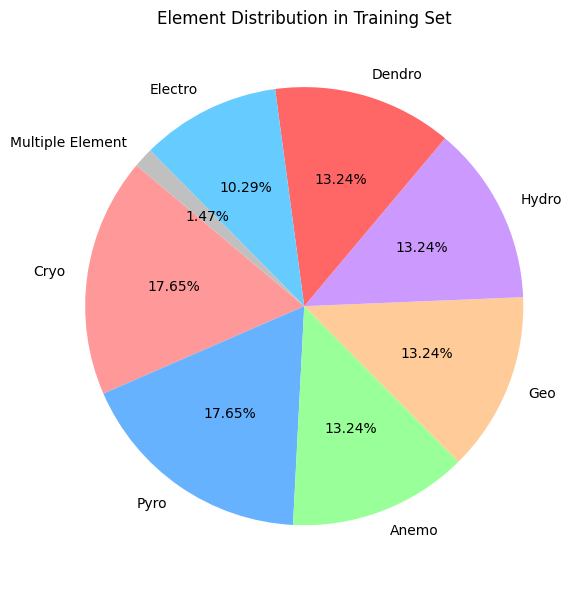

In [ ]:
# @title Just a Pie vizualisation of the differents classes of Elements


# Pie Chart 1: Distribution of Elements in the Training Set
plt.figure(figsize=(8, 6)) # Adjust figure size as we only have one plot
element_counts = y_train.value_counts()
elements = element_counts.index.tolist()
counts = element_counts.tolist()

# Define the colors (you can customize these)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CC99FF', '#FF6666', '#66CCFF', '#C0C0C0'] # Added a color for 'Multiple Element'

plt.pie(counts, labels=elements, colors=colors, autopct='%0.2f%%', startangle=140)
plt.title("Element Distribution in Training Set")

plt.tight_layout()  # Adjust subplot parameters for a tight layout.
plt.show()

### **2. Implementation of a preprocessing pipeline**

In [ ]:
# create preprocessor

# We selects the columns by their data type and separate them
cat_select = make_column_selector(dtype_include='object') # Creating a categorical data selector
num_select = make_column_selector(dtype_include='number') # Creating a numeric data selector

# Normalization of the features / Instantiating the Transformers
scaler = StandardScaler()

# Categorical features need to be encoded
# We transform categorical features into numerical such that
# machine learning model understand.
# Instantiating the encoder

ohe = OneHotEncoder(handle_unknown='ignore')

# Defining a tuple for each pathway
num_tuple = ('num', scaler, num_select)
cat_tuple = ('cat', ohe, cat_select)

# preprocessing pipeline
processor = ColumnTransformer([num_tuple, cat_tuple], remainder='passthrough')

**We have done in the previous lines :**

1.   Identifying the categorical and numerical columns.
2.   Applying one-hot encoding to categorical columns in order to change categorical/objects into numerical values (binary: 0 or 1 )
3.   Applying StandardScaler to numerical values in order to normalize them (each feature will have a mean of 0 and a standard deviation/variance of 1)
4.   Combinaison of these transformations into a single preprocessing pipeline using ColumnTransformer which can then be applied on our dataset.

These are necessary for the machine learning models because they often require numerical input and categorical features, by their nature, are not numerical ($⇒$ use of One Hot Encoder).

On the other hand, StandardScaler prevents the feature dominance problem that is to say, some features maay have large numerical values range like ATK or the DEF for instance. That's why we must normalize the features using StandardScaler which brings a certain equilibrium between the differents numerical(float or int datatype) features.

Whereas, the column transformer allows to keeps all the previous preprocessing steps in only one tuple avoiding any data leakage to happens.



In [ ]:
# @title Model's evaluation function
# Define a function to evaluate models
def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=None)
  precision = precision_score(y_true, y_predicted, average=None)
  f1 = f1_score(y_true, y_predicted, average=None)

  # Get unique labels from the true labels (y_true) to ensure we only iterate through labels present in the test set
  test_labels = y_true.unique().tolist()

  print(f'Accuracy: {accuracy}')
  # Iterate through the labels present in the test set for per-label metrics
  for i, label in enumerate(test_labels):
    print(f'Recall for {label}: {recall[i]:.3f}')
  for i, label in enumerate(test_labels):
    print(f'Precision for {label}: {precision[i]:.3f}')
  for i, label in enumerate(test_labels):
    print(f'f1_score for {label}: {f1[i]:.3f}')

In [ ]:
# Process the data
X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

## **3. Applications of classical machine learning models**

### **1. Classical Machine learning model : Random Forest Classifier**

In [ ]:
# Train a Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42) # Using 'liblinear' solver for small datasets
log_reg.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_processed)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
evaluate_classification(y_test, y_pred)

Logistic Regression Model Evaluation:
Accuracy: 0.34782608695652173
Recall for Electro: 0.333
Recall for Hydro: 0.000
Recall for Pyro: 1.000
Recall for Geo: 0.143
Recall for Dendro: 0.500
Recall for Anemo: 0.750
Recall for Cryo: 0.333
Precision for Electro: 0.333
Precision for Hydro: 0.000
Precision for Pyro: 0.200
Precision for Geo: 0.500
Precision for Dendro: 0.333
Precision for Anemo: 1.000
Precision for Cryo: 0.250
f1_score for Electro: 0.333
f1_score for Hydro: 0.000
f1_score for Pyro: 0.333
f1_score for Geo: 0.222
f1_score for Dendro: 0.400
f1_score for Anemo: 0.857
f1_score for Cryo: 0.286


### **2. Classical Machine learning model : Random Forest Classifier**

In [ ]:
# Train a Random Forest Classifier model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test_processed)

# Evaluate the model
print("\nRandom Forest Classifier Model Evaluation:")
evaluate_classification(y_test, y_pred_rf)


Random Forest Classifier Model Evaluation:
Accuracy: 0.30434782608695654
Recall for Electro: 0.333
Recall for Hydro: 0.000
Recall for Pyro: 1.000
Recall for Geo: 0.000
Recall for Dendro: 1.000
Recall for Anemo: 0.750
Recall for Cryo: 0.000
Precision for Electro: 0.500
Precision for Hydro: 0.000
Precision for Pyro: 0.250
Precision for Geo: 0.000
Precision for Dendro: 1.000
Precision for Anemo: 0.600
Precision for Cryo: 0.000
f1_score for Electro: 0.400
f1_score for Hydro: 0.000
f1_score for Pyro: 0.400
f1_score for Geo: 0.000
f1_score for Dendro: 1.000
f1_score for Anemo: 0.667
f1_score for Cryo: 0.000


To begin with, we can remind what is the accuracy metric : It measures how the model performs well. Indeed, it's the proportion of correct predictions made by a model out of the total predictions. In our case, with the Random Forest model we get an accuracy of `0.30434782608695654` on the test set. In order words, the model is subject of a somewhat poor performance on the unseen data because we have only `30,43
%` of correct instances.

In [1]:
# @title Confusion Matrix for Random Forest Classifier

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_).plot()
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

NameError: name 'confusion_matrix' is not defined

## **4. Applications of neural networks models**

### **1. Neural Network Model**